In [241]:
# !pip install qiskit torch torchvision matplotlib
# !pip install qiskit-machine-learning
# !pip install torchviz

# !pip install qiskit[all]
# !pip install qiskit == 0.45.2
# !pip install qiskit_algorithms == 0.7.1
# !pip install qiskit-ibm-runtime == 0.17.0
# !pip install qiskit-aer == 0.13.2

# #Quentum net draw
# !pip install pylatexenc

In [247]:
import os
MODEL_METADATA = "SVM"
model_name = "efficientnet_b3_embeddings_feat_space_2"#"efficientnet_v2_m"#"convnext_base"#"efficientnet_b3"#"mobileNet"
results_path = f"{model_name}/{MODEL_METADATA}"
os.makedirs(results_path, exist_ok = True)
train_path = f"{model_name}/train"
val_path = f"{model_name}/val"
os.makedirs(train_path, exist_ok = True)
os.makedirs(val_path, exist_ok=True)

In [248]:
from qiskit_algorithms.utils import algorithm_globals
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from sklearn.metrics import confusion_matrix, classification_report
algorithm_globals.random_seed = 12345

### Load embeddings

In [249]:
train_embeddings = pd.read_csv(f'{train_path}/train_embeddings.csv')
val_embeddings = pd.read_csv(f'{val_path}/val_embeddings.csv')
print(f"Reading embeddings from: ", train_path)
# Prepare data for training
train_features = train_embeddings.iloc[:, :-1].values  # Features
y_train = train_embeddings.iloc[:, -1].values   # Labels

test_features = val_embeddings.iloc[:, :-1].values      # Features
y_val = val_embeddings.iloc[:, -1].values       # Labels


Reading embeddings from:  efficientnet_b3_embeddings_feat_space_2/train


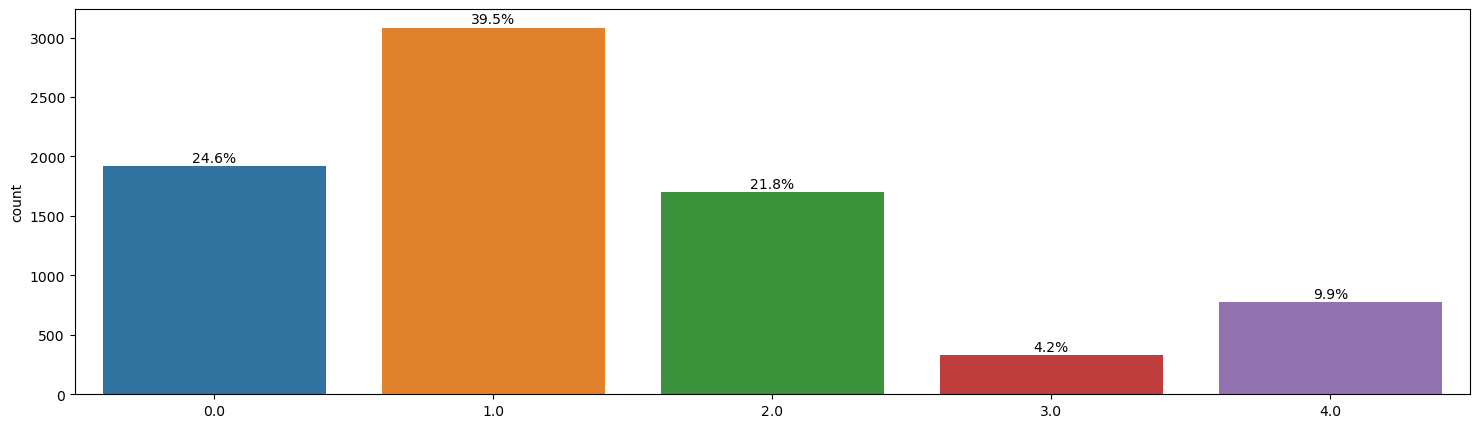

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [250]:
plt.figure(figsize=(18, 5))

ax = sns.countplot(x=y_train, palette='tab10')

total = len(y_train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.show()

train_labels

# Binary case



In [251]:
adhoc_dimension = 2

In [252]:
"""
class 0 : {0,2}
class 1 : {1,3}
"""
label_map = {0: 0, 
             1: 1, 
             2: 0, 
             3: 1, 
             4: 0}

# Merge labels using the dictionary
labels_train = np.array([label_map[label] for label in y_train])
test_labels = np.array([label_map[label] for label in y_val])

print(f"training".center(60,"-"))
print("Original labels:", np.unique(y_train))
print("Merged labels:", np.unique(merged_labels))
print(f"testing".center(60,"-"))
print("Original labels:", np.unique(train_labels))
print("Merged labels:", np.unique(y_val))

--------------------------training--------------------------
Original labels: [0. 1. 2. 3. 4.]
Merged labels: [0 1]
--------------------------testing---------------------------
Original labels: [0 1]
Merged labels: [0. 1. 2. 3. 4.]


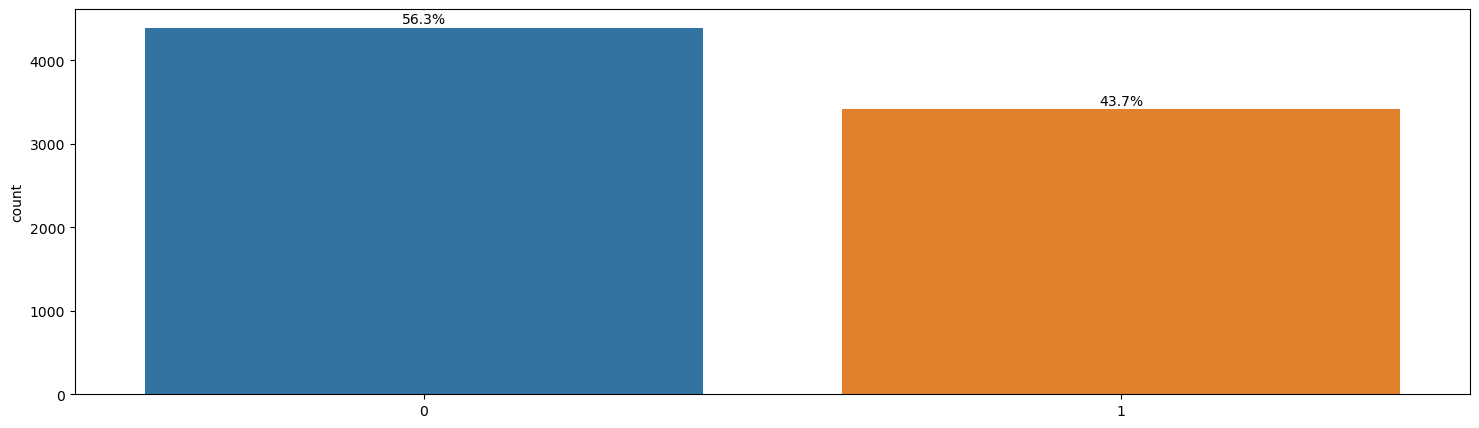

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [253]:
plt.figure(figsize=(18, 5))

ax = sns.countplot(x=labels_train, palette='tab10')

total = len(labels_train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.show()

train_labels

In [254]:
print(train_features.shape, labels_train.shape)
print(test_features.shape, test_labels.shape)

(7808, 2) (7808,)
(850, 2) (850,)


In [255]:
adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement="linear")

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

adhoc_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=adhoc_feature_map)

In [256]:
train_features.shape

(7808, 2)

In [258]:
# feat_2_train = train_features[:,:2]
# feat_2_test = test_features[:,:2]
feat_2_train.shape, feat_2_test.shape, labels_train.shape, test_labels.shape

((7808, 2), (850, 2), (7808,), (850,))

In [259]:
train_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [260]:
# feat_2_train = feat_2_train[:500]
# feat_2_test = feat_2_test[:50]
# labels_train = labels_train[:500]
# test_labels = test_labels[:50]
feat_2_train.shape, feat_2_test.shape, labels_train.shape, test_labels.shape

((7808, 2), (850, 2), (7808,), (850,))

In [ ]:
import time
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, fbeta_score
from sklearn.svm import SVC

# Start timer for training
start_train = time.time()

adhoc_svc = SVC(kernel=adhoc_kernel.evaluate)
adhoc_svc.fit(feat_2_train, labels_train)

# End timer for training
end_train = time.time()

# Start timer for inference
start_inference = time.time()

predictions = adhoc_svc.predict(feat_2_test)

# End timer for inference
end_inference = time.time()

accuracy = accuracy_score(test_labels, predictions)
precision = precision_score(test_labels, predictions, average='weighted')
f1 = f1_score(test_labels, predictions, average='weighted')
recall = recall_score(test_labels, predictions, average='weighted')
fbeta_75 = fbeta_score(test_labels, predictions, beta=0.75, average='weighted')

# Print metrics and time
print(f"Accuracy: {accuracy} Precision: {precision} F1 Score: {f1} Recall: {recall} F0.75 Score: {fbeta_75}")
print(f"Training time: {end_train - start_train} seconds")
print(f"Inference time: {end_inference - start_inference} seconds")

In [ ]:
y_pred = predictions
y_val = test_labels

In [ ]:
unique_classes = np.unique(np.concatenate(((y_pred, y_val))))
confusion_mat = confusion_matrix(y_pred, y_val, labels=unique_classes)
conf_matrix = pd.DataFrame(confusion_mat, index=unique_classes, columns=unique_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(5, 4))
ax = sns.heatmap(conf_matrix, annot=True,  fmt='.1f', cmap=sns.cubehelix_palette(as_cmap=True), linewidths=0.1, cbar=True)

# Set labels and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

# Set x and y ticks using the unique classes
ax.set_xticks(range(len(unique_classes)))
ax.set_yticks(range(len(unique_classes)))

# Set x and y ticks at the center of the cells
ax.set_xticks([i + 0.5 for i in range(len(unique_classes))])
ax.set_yticks([i + 0.5 for i in range(len(unique_classes))])

plt.show()

In [ ]:
report = classification_report(y_val,y_pred, target_names=unique_classes,output_dict=True)# Mostrar el informe de 

df = pd.DataFrame(report).transpose()
df.to_csv(os.path.join(results_path, f"confusion_matrix_{MODEL_METADATA}.csv"))
print(df)